# Load Dataset

In [3]:
import pandas as pd

# Load the dataset from CSV file
df = pd.read_csv("apple_quality.csv")

# Remove the string value from the Acidity column
df = df[df['Acidity'] != 'Created_by_Nidula_Elgiriyewithana']

# Turn Acidity column into a float
df['Acidity'] = pd.to_numeric(df['Acidity'])

# Display column names, non-null count, and data type
# Display row count and column count
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 312.5+ KB


(4000, 9)

# Raw Data Distribution

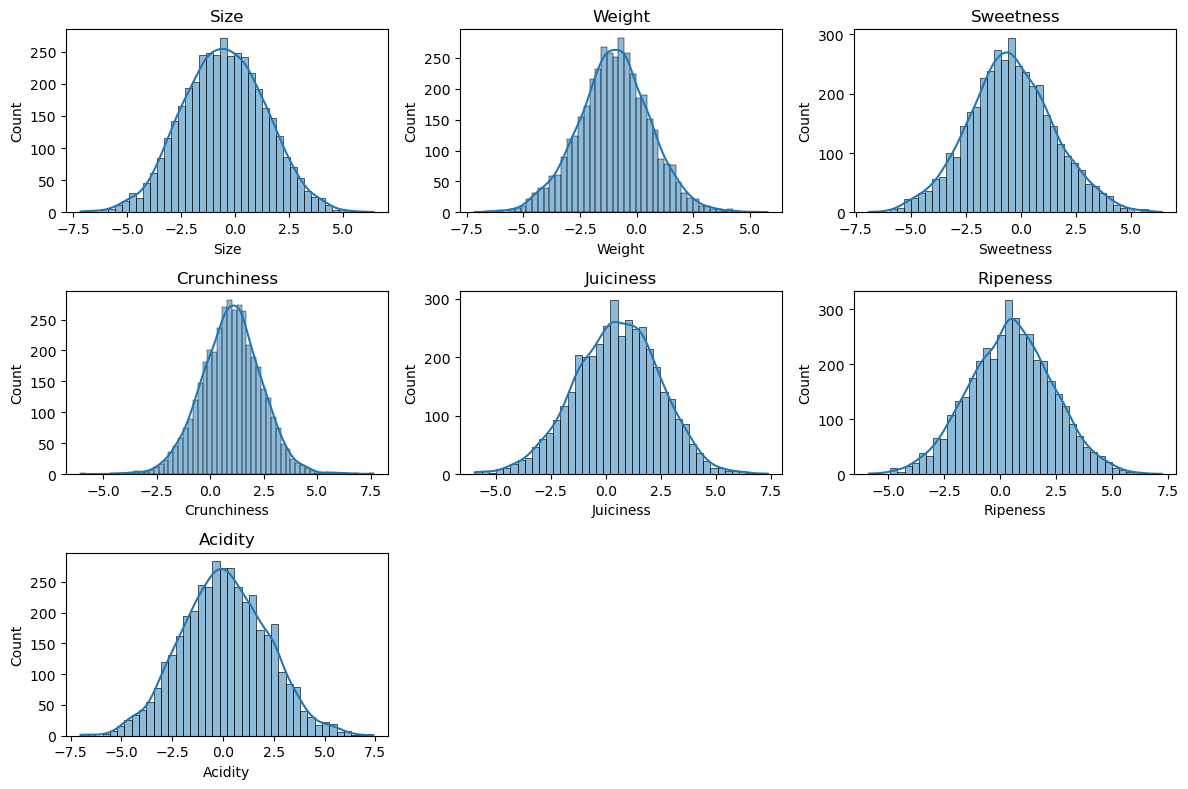


mean:
Size          -0.503015
Weight        -0.989547
Sweetness     -0.470479
Crunchiness    0.985478
Juiciness      0.512118
Ripeness       0.498277
Acidity        0.076877
dtype: float64 , 
median:
Size          -0.513703
Weight        -0.984736
Sweetness     -0.504758
Crunchiness    0.998249
Juiciness      0.534219
Ripeness       0.503445
Acidity        0.022609
dtype: float64 , 
std:
 Size           1.928059
Weight         1.602507
Sweetness      1.943441
Crunchiness    1.402757
Juiciness      1.930286
Ripeness       1.874427
Acidity        2.110270
dtype: float64


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for some of the features
features_to_plot = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

print("\nmean:\n{} , \nmedian:\n{} , \nstd:\n {}".format(df[features_to_plot].mean() , df[features_to_plot].median(), df[features_to_plot].std()))

# Standardization without Removing Outliers

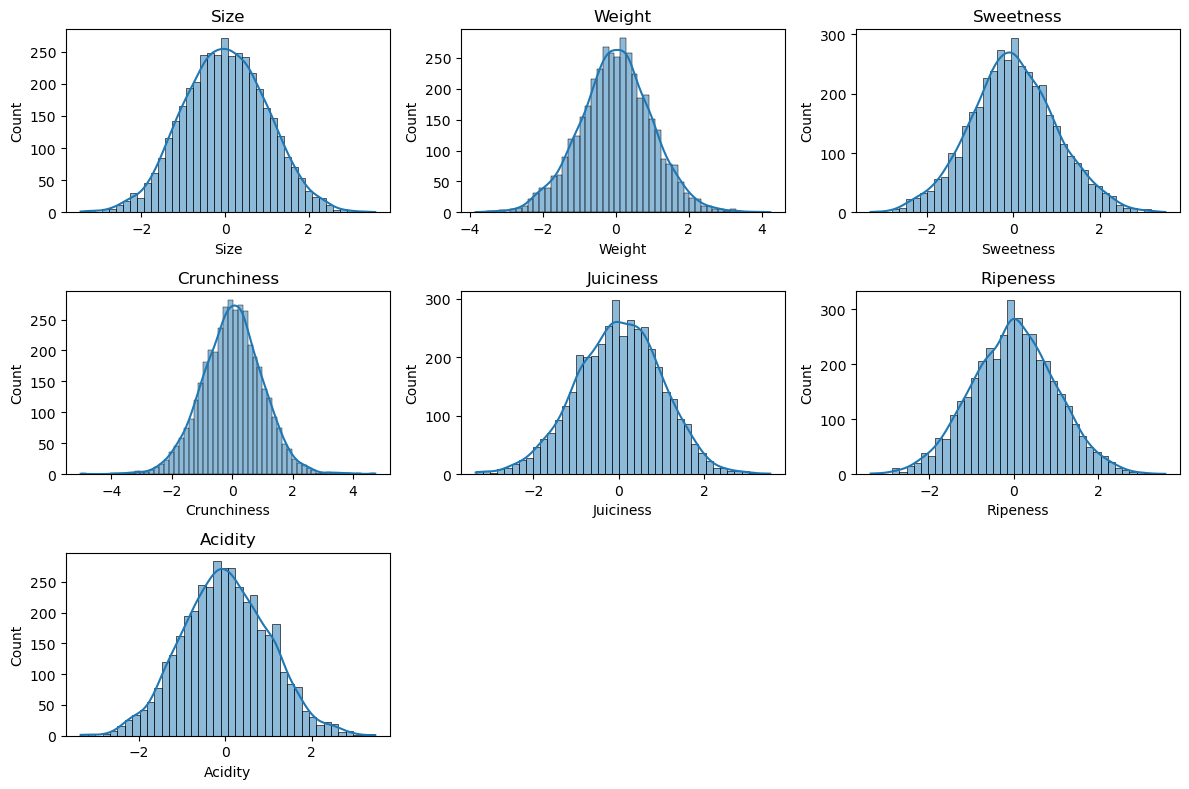


mean:
Size           4.263256e-17
Weight        -1.643130e-17
Sweetness     -3.419487e-17
Crunchiness    1.065814e-17
Juiciness     -2.486900e-17
Ripeness      -4.440892e-18
Acidity       -2.309264e-17
dtype: float64 , 
median:
Size          -0.005543
Weight         0.003002
Sweetness     -0.017639
Crunchiness    0.009105
Juiciness      0.011449
Ripeness       0.002757
Acidity       -0.025716
dtype: float64 , 
std:
 Size           1.0
Weight         1.0
Sweetness      1.0
Crunchiness    1.0
Juiciness      1.0
Ripeness       1.0
Acidity        1.0
dtype: float64


In [5]:
# Assign 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity' features to X
X = df.loc[:, ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]

# Normalizing the independent variables using z-score normalization
data_mean = X.mean()
data_std = X.std()

# Perform z-score normalization
normalized_X_zscore = (X - data_mean) / data_std

# Plot histograms for some of the features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(normalized_X_zscore[feature], kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()


print("\nmean:\n{} , \nmedian:\n{} , \nstd:\n {}".format(normalized_X_zscore.mean() , normalized_X_zscore.median(), normalized_X_zscore.std()))


# Finding Outliers

In [6]:
# Compute the IQR Q1, Q2, Q3, IQR, min and max. Visualize with a boxplot
Q1 = X.quantile(0.25)
Q2 = X.quantile(0.5)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
min = X.min()
max = X.max()

print("\nQ1:\n{} , \nQ2:\n{} , \nQ3:\n{} , \nIQR:\n{} , \nmin:\n{} , \nmax:\n{}".format(Q1, Q2, Q3, IQR, min, max))

# print out the number outliers that were found
outliers = (X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))
print("\nOutliers:\n", outliers.sum())


Q1:
Size          -1.816765
Weight        -2.011770
Sweetness     -1.738425
Crunchiness    0.062764
Juiciness     -0.801286
Ripeness      -0.771677
Acidity       -1.377424
Name: 0.25, dtype: float64 , 
Q2:
Size          -0.513703
Weight        -0.984736
Sweetness     -0.504758
Crunchiness    0.998249
Juiciness      0.534219
Ripeness       0.503445
Acidity        0.022609
Name: 0.5, dtype: float64 , 
Q3:
Size           0.805526
Weight         0.030976
Sweetness      0.801922
Crunchiness    1.894234
Juiciness      1.835976
Ripeness       1.766212
Acidity        1.510493
Name: 0.75, dtype: float64 , 
IQR:
Size           2.622291
Weight         2.042747
Sweetness      2.540347
Crunchiness    1.831470
Juiciness      2.637262
Ripeness       2.537889
Acidity        2.887917
dtype: float64 , 
min:
Size          -7.151703
Weight        -7.149848
Sweetness     -6.894485
Crunchiness   -6.055058
Juiciness     -5.961897
Ripeness      -5.864599
Acidity       -7.010538
dtype: float64 , 
max:
Size   

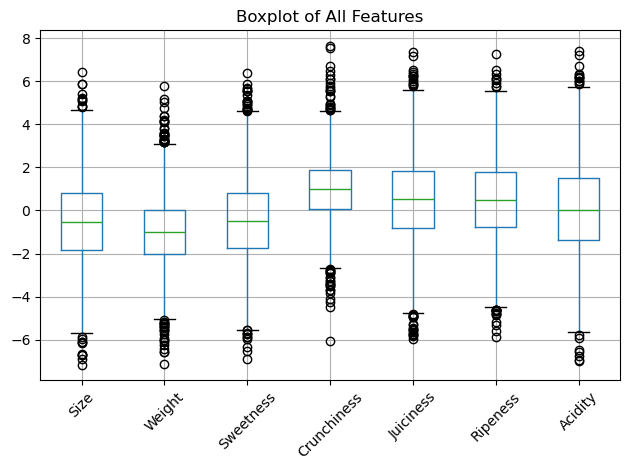

In [7]:
# Use the boxplot method to plot all numeric features, this gives outliers per feature
df[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']].boxplot()
plt.title("Boxplot of All Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculating lower and upper limit for determining outliers

In [8]:
# Calculate the boundaries for each feature
def boundaries(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    print(feature)
    print(lower_limit, upper_limit)
    outliers = df[(df[feature] < lower_limit) | (df[feature] > upper_limit)]
    #print(outliers)

# Find the boundaries for the 7 features
for i in df[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]:
    boundaries(df, i)

Size
-5.75020099175 4.73896291425
Weight
-5.075890391874999 3.0950965391249996
Sweetness
-5.54894553775 4.61244239625
Crunchiness
-2.6844403373750003 4.641438949625
Juiciness
-4.7571791193749995 5.791869691624999
Ripeness
-4.578509627375 5.573044401624999
Acidity
-5.7092993302499995 5.84236800775


# Removing Outliers

In [9]:
def remove_outliers(df, features):
    # Initialize a mask that starts as all True
    mask = pd.Series([True] * len(df))
    
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        
        # Update the mask to exclude outliers for the current feature
        mask &= (df[feature] >= lower_limit) & (df[feature] <= upper_limit)

    # Return the DataFrame without outliers
    return df[mask]

# Define the features
features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

# Get the cleaned DataFrame
cleaned_df = remove_outliers(df, features)

cleaned_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3790 entries, 1 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         3790 non-null   float64
 1   Size         3790 non-null   float64
 2   Weight       3790 non-null   float64
 3   Sweetness    3790 non-null   float64
 4   Crunchiness  3790 non-null   float64
 5   Juiciness    3790 non-null   float64
 6   Ripeness     3790 non-null   float64
 7   Acidity      3790 non-null   float64
 8   Quality      3790 non-null   object 
dtypes: float64(8), object(1)
memory usage: 296.1+ KB


# Boxplot after Removing Outliers

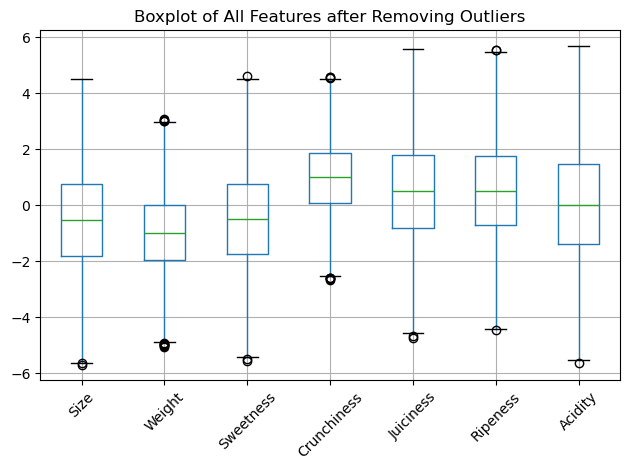

In [10]:
# Use the boxplot method to plot all numeric features, this gives outliers per feature
cleaned_df[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']].boxplot()
plt.title("Boxplot of All Features after Removing Outliers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Original number of rows: 4000

Size:
Number of outliers: 22
Outlier boundaries: [-5.75, 4.74]

Weight:
Number of outliers: 54
Outlier boundaries: [-5.08, 3.10]

Sweetness:
Number of outliers: 32
Outlier boundaries: [-5.55, 4.61]

Crunchiness:
Number of outliers: 47
Outlier boundaries: [-2.68, 4.64]

Juiciness:
Number of outliers: 32
Outlier boundaries: [-4.76, 5.79]

Ripeness:
Number of outliers: 24
Outlier boundaries: [-4.58, 5.57]

Acidity:
Number of outliers: 20
Outlier boundaries: [-5.71, 5.84]

Number of rows after removing outliers: 3790
Total rows removed: 210


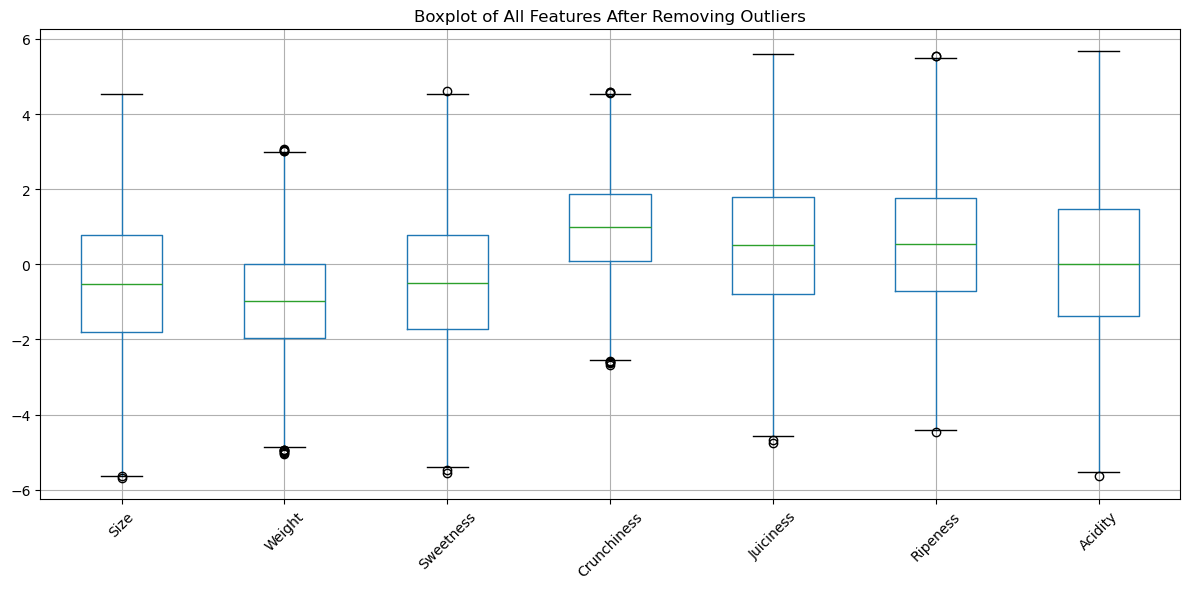

In [11]:
# I get similar results using Marina's code

# First let's see how many rows we have before dropping outliers
print(f"Original number of rows: {len(df)}")

# Calculate outlier boundaries and create a mask for non-outlier rows
features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']
mask = pd.Series(True, index=df.index)  # Start with all True

for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers for this feature
    feature_outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"\n{feature}:")
    print(f"Number of outliers: {len(feature_outliers)}")
    print(f"Outlier boundaries: [{lower_bound:.2f}, {upper_bound:.2f}]")
    
    # Update mask to exclude outliers
    mask = mask & (df[feature] >= lower_bound) & (df[feature] <= upper_bound)

# Create new dataframe without outliers, to see the diff
df_cleaned = df[mask]

print(f"\nNumber of rows after removing outliers: {len(df_cleaned)}")
print(f"Total rows removed: {len(df) - len(df_cleaned)}")

# Plot boxplots of cleaned data
plt.figure(figsize=(12, 6))
df_cleaned[features].boxplot()
plt.title("Boxplot of All Features After Removing Outliers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Standardization after Removing Outliers

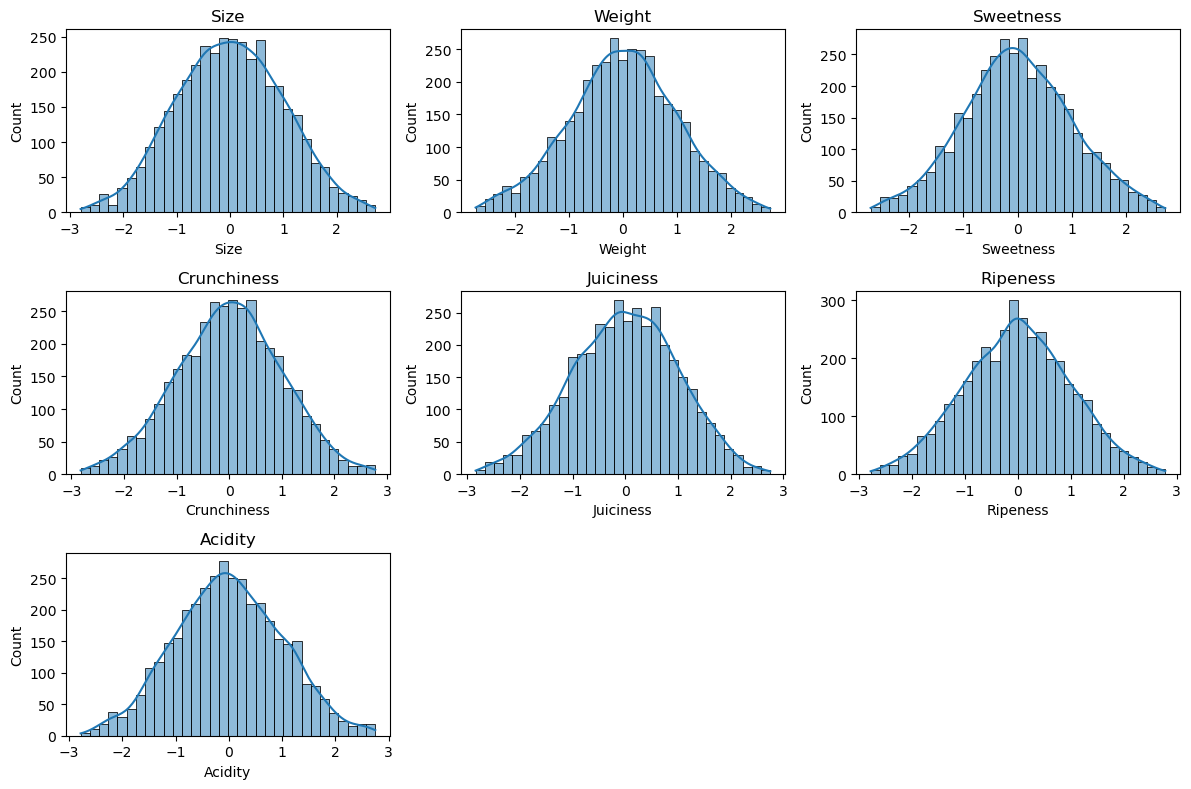


mean:
Size          -1.124870e-17
Weight        -1.124870e-17
Sweetness      3.702696e-17
Crunchiness   -5.061914e-17
Juiciness     -2.530957e-17
Ripeness      -6.561740e-17
Acidity        1.874783e-17
dtype: float64 , 
median:
Size          -0.001824
Weight         0.005356
Sweetness     -0.014197
Crunchiness    0.008999
Juiciness      0.005486
Ripeness      -0.000164
Acidity       -0.021409
dtype: float64 , 
std:
 Size           1.0
Weight         1.0
Sweetness      1.0
Crunchiness    1.0
Juiciness      1.0
Ripeness       1.0
Acidity        1.0
dtype: float64


In [12]:
# Assign 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity' features to X_without_outlier
X_without_outlier = cleaned_df.loc[:, ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]

# Normalizing the independent variables using z-score normalization
data_mean_without_outlier = X_without_outlier.mean()
data_std_without_outlier = X_without_outlier.std()

# Perform z-score normalization
normalized_X_zscore_without_outlier = (X_without_outlier - data_mean_without_outlier) / data_std_without_outlier

# Plot histograms for some of the features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(normalized_X_zscore_without_outlier[feature], kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()


print("\nmean:\n{} , \nmedian:\n{} , \nstd:\n {}".format(normalized_X_zscore_without_outlier.mean() , normalized_X_zscore_without_outlier.median(), normalized_X_zscore_without_outlier.std()))


# EDA

## Pairplot

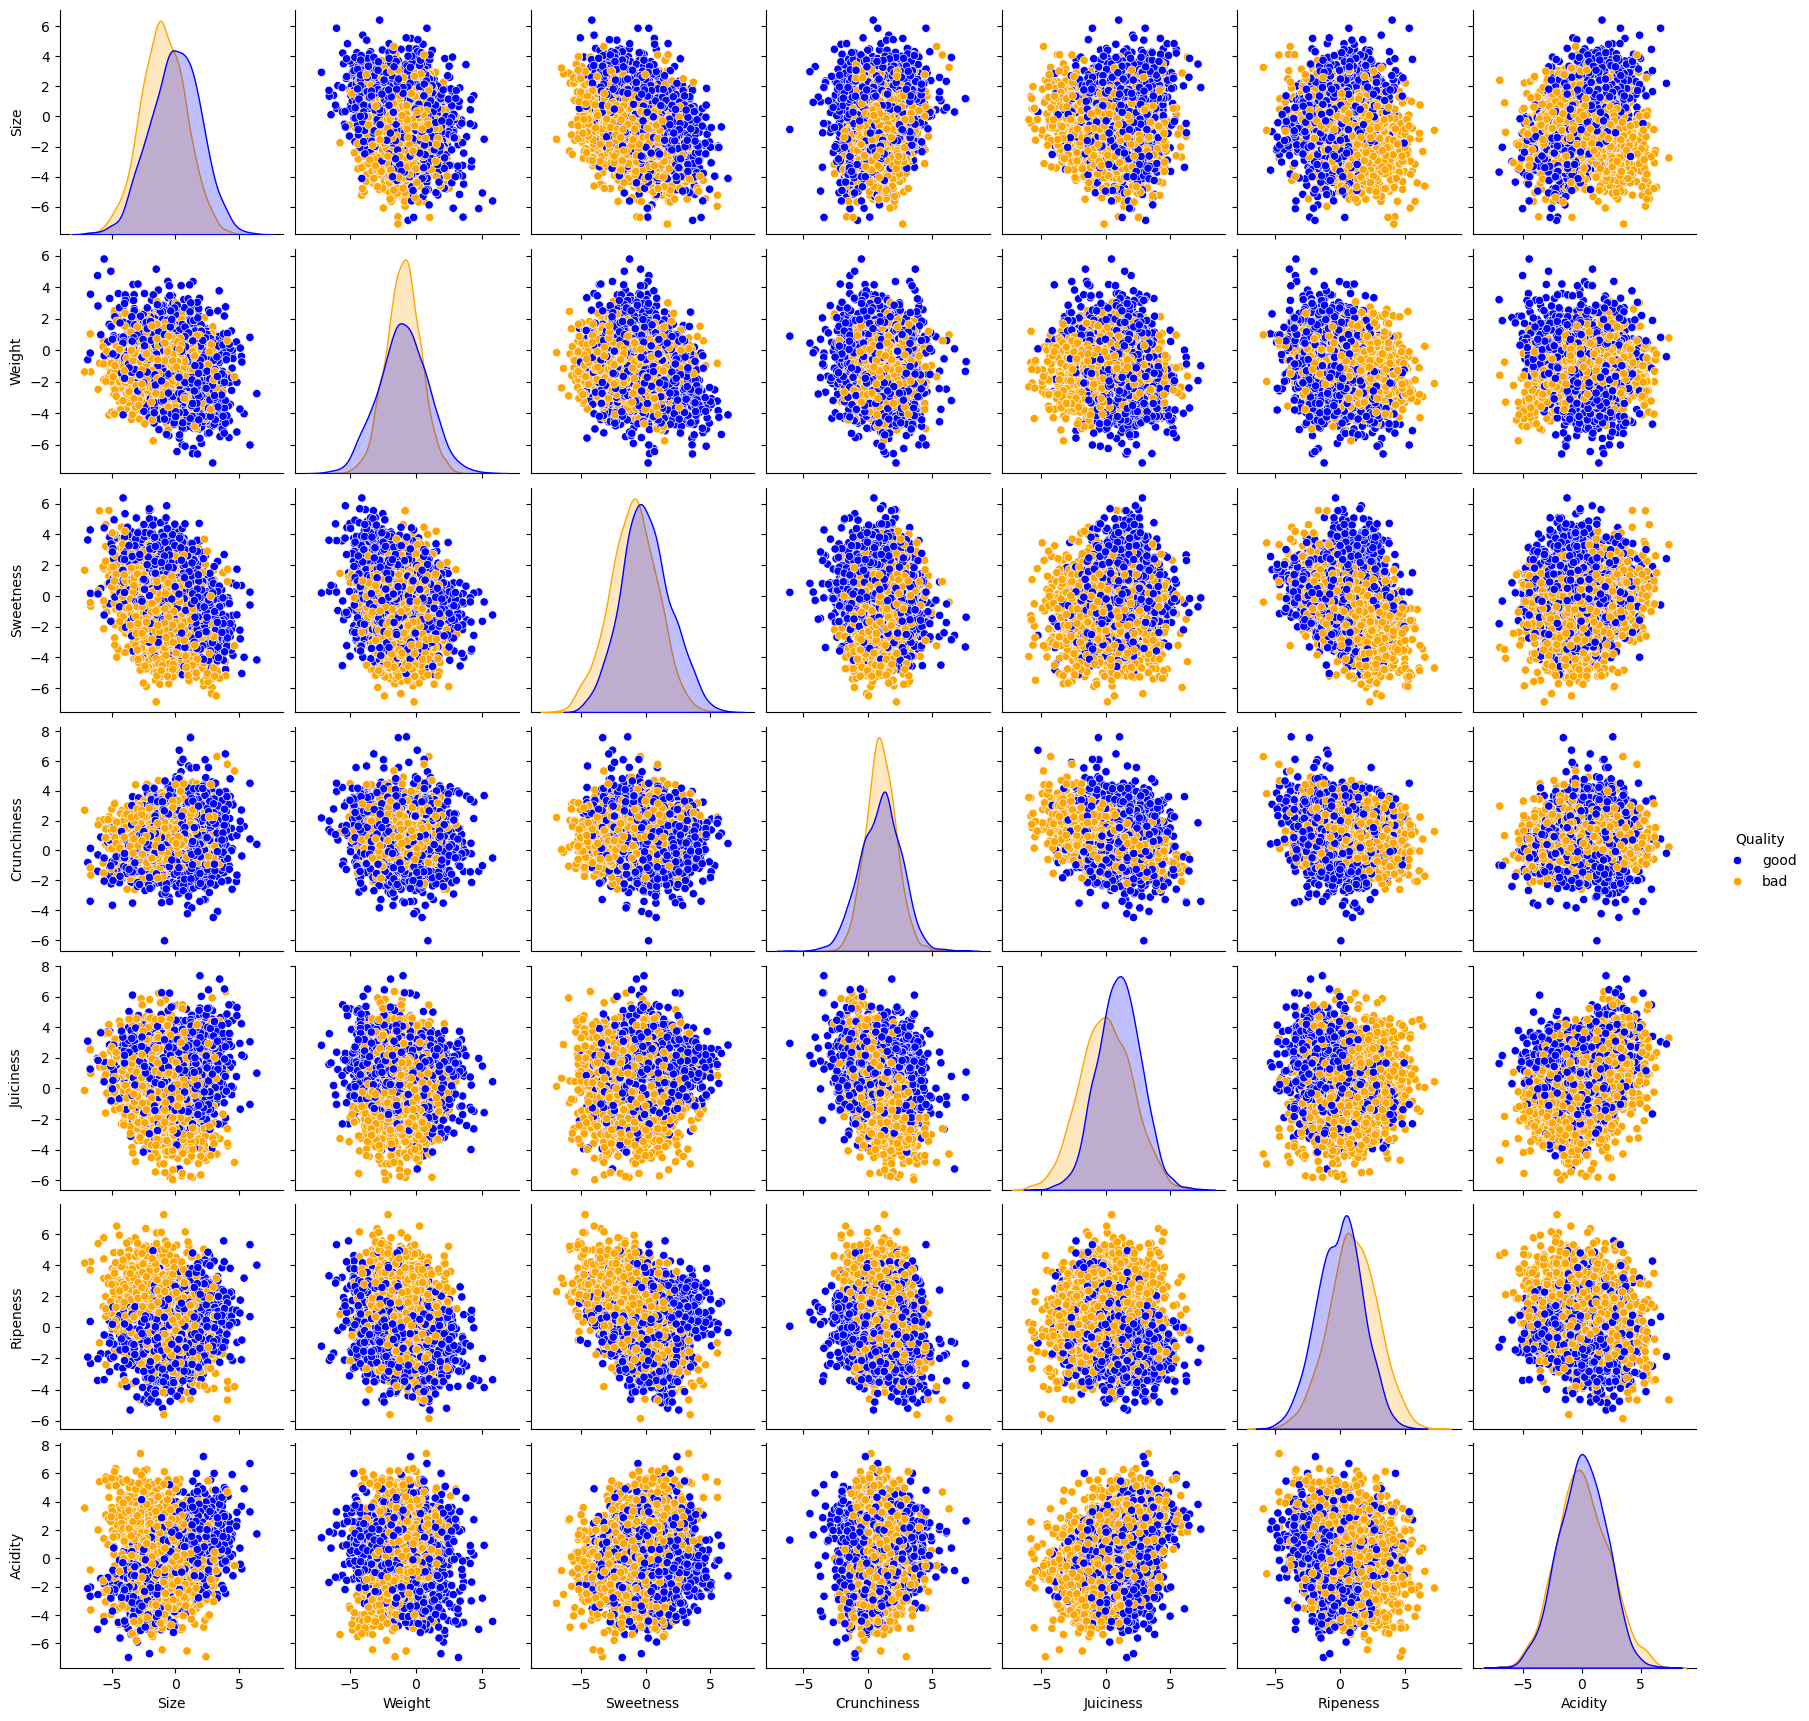

In [13]:
# drop A_id from df because it is not relevant for the pairplot
df_eda = df.iloc[:,1:]

# visualize new dataframe
df_eda.head()


# Hue is set to quality, meaning that points in the scatterplot and histogram are color-coded by the quality
# good quality = blue, bad quality = orange
custom_colors = {
    'good': 'blue',
    'bad': 'orange'
}

sns.pairplot(data=df_eda, hue='Quality', palette=custom_colors)

plt.show()

## Correlation Matrix

Correlation Matrix
                  Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
Size         1.000000 -0.170702  -0.324680     0.169868  -0.018892 -0.134773   
Weight      -0.170702  1.000000  -0.154246    -0.095882  -0.092263 -0.243824   
Sweetness   -0.324680 -0.154246   1.000000    -0.037552   0.095882 -0.273800   
Crunchiness  0.169868 -0.095882  -0.037552     1.000000  -0.259607 -0.201982   
Juiciness   -0.018892 -0.092263   0.095882    -0.259607   1.000000 -0.097144   
Ripeness    -0.134773 -0.243824  -0.273800    -0.201982  -0.097144  1.000000   
Acidity      0.196218  0.016414   0.085999     0.069943   0.248714 -0.202669   

              Acidity  
Size         0.196218  
Weight       0.016414  
Sweetness    0.085999  
Crunchiness  0.069943  
Juiciness    0.248714  
Ripeness    -0.202669  
Acidity      1.000000  


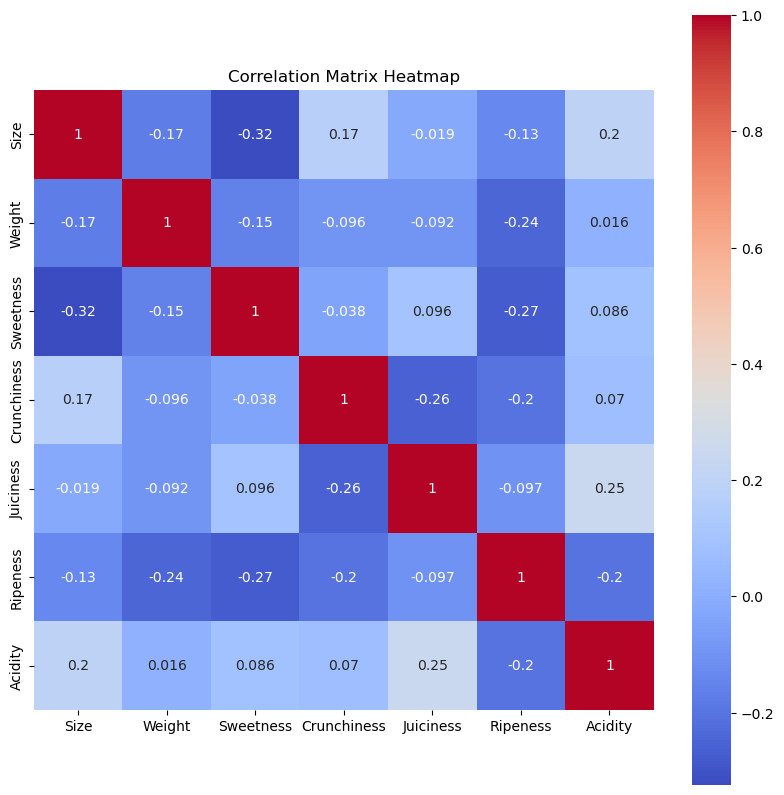

In [14]:
# select only numeric features from the dataset for the correlation matrix
corr_features = df_eda.select_dtypes(include=['int64', 'float64'])

# use pearson correlation as data is continuous and appears normally distributed
corr_matrix = corr_features.corr(method='pearson')

print("Correlation Matrix\n", corr_matrix)

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, cmap='coolwarm', square=True, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Skewness Analysis using Histograms

In [15]:

# Calculate skewness for each feature to understand the distribution shape
skewness = df[features_to_plot].skew()
print("Skewness for each feature:\n", skewness)


Skewness for each feature:
 Size          -0.002437
Weight         0.003102
Sweetness      0.083850
Crunchiness    0.000230
Juiciness     -0.113421
Ripeness      -0.008764
Acidity        0.055783
dtype: float64


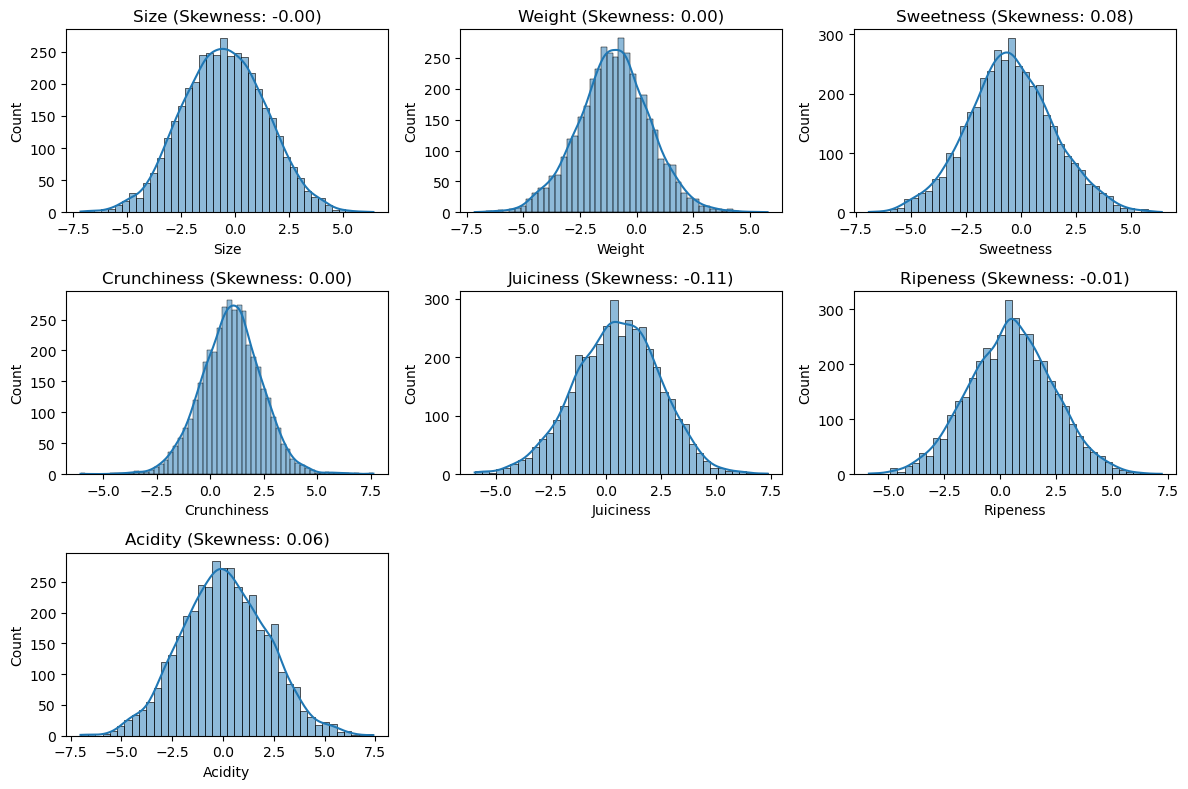

In [16]:
# Plotting skewness using histograms for better visualization
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} (Skewness: {skewness[feature]:.2f})")

plt.tight_layout()
plt.show()


## Variable Type Counts


Unique counts for each feature (number of distinct values):
 A_id           4000
Size           4000
Weight         4000
Sweetness      4000
Crunchiness    4000
Juiciness      4000
Ripeness       4000
Acidity        4000
Quality           2
dtype: int64


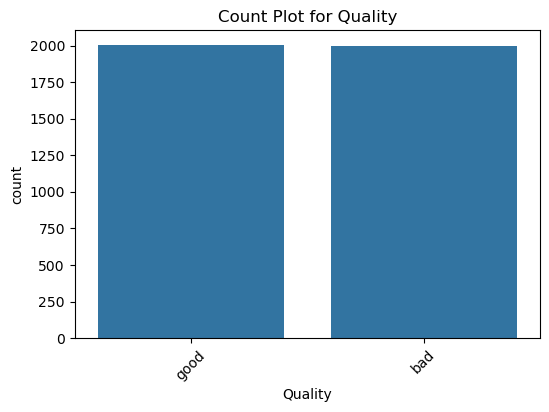

In [17]:

# Determine if there are any categorical variables, their types, and counts of unique values if applicable
unique_counts = df.nunique()
print("\nUnique counts for each feature (number of distinct values):\n", unique_counts)

# If there are categorical features, plot their counts to see the distribution across categories
categorical_features = df.select_dtypes(include=['object']).columns  # Identify categorical columns if any

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=feature)
    plt.title(f"Count Plot for {feature}")
    plt.xticks(rotation=45)
    plt.show()

## Q-Q Plot

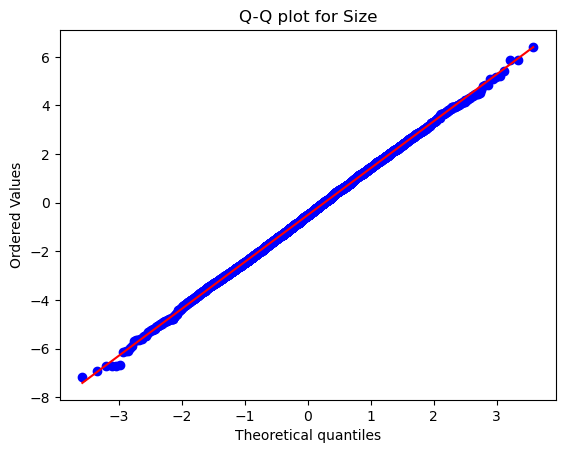

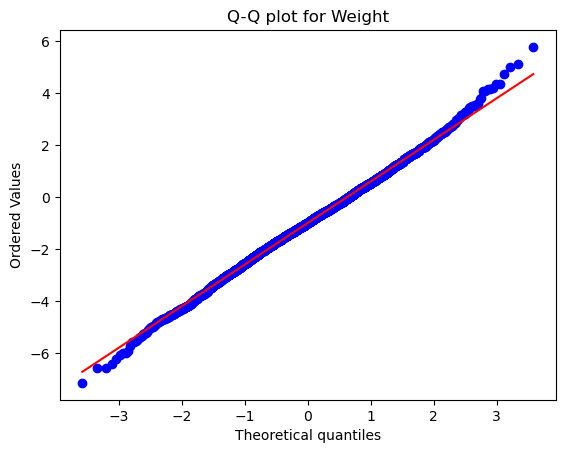

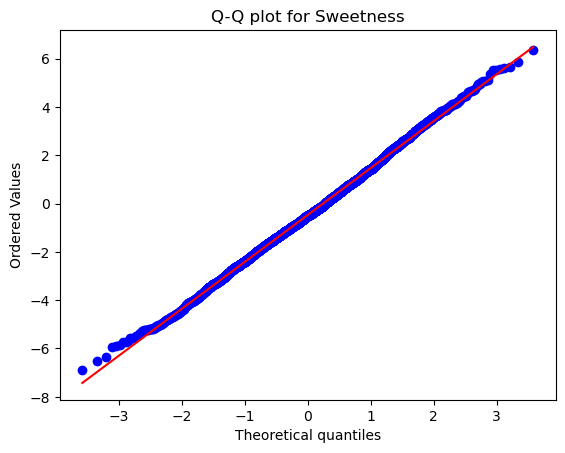

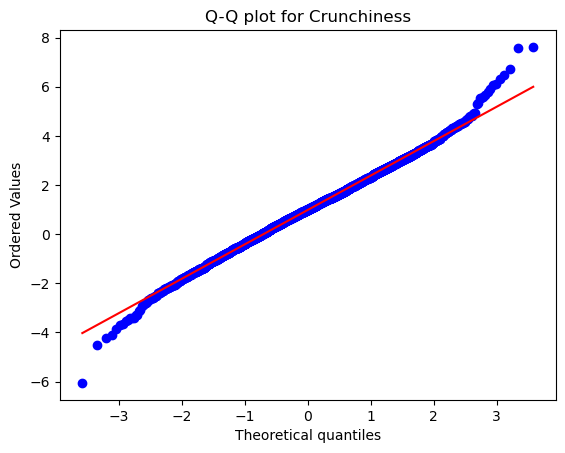

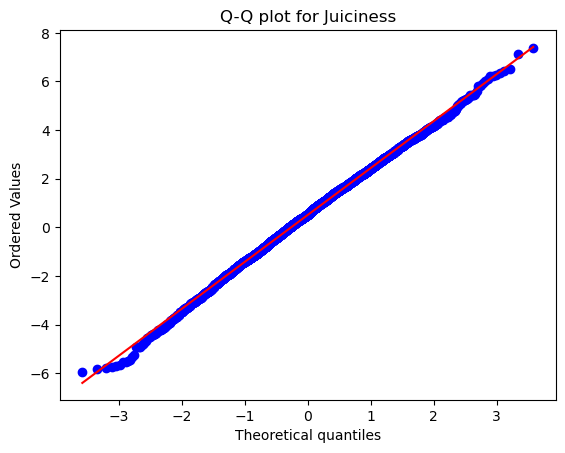

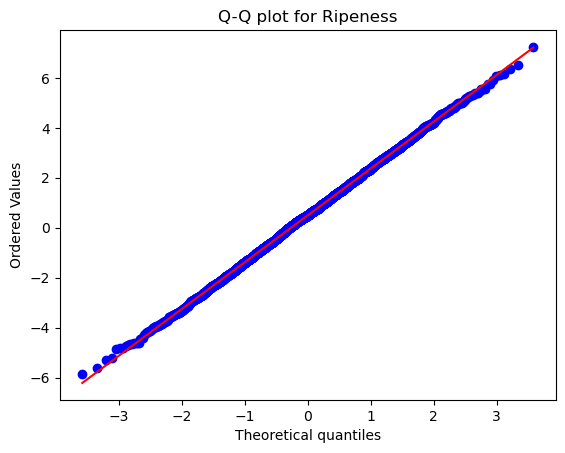

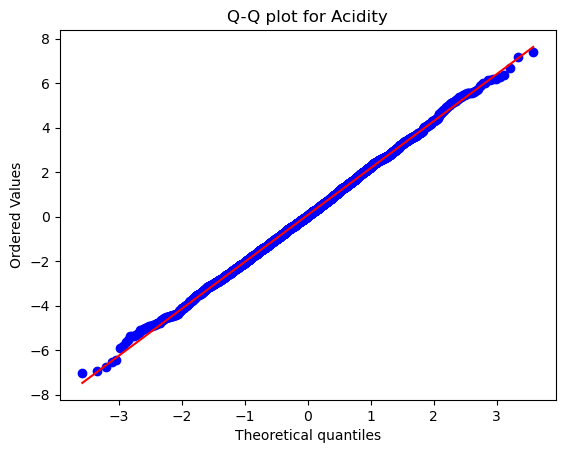

In [18]:
import scipy.stats as stats
import matplotlib.pyplot as plt

for feature in features:
    plt.figure()
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.title(f'Q-Q plot for {feature}')
    plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn.model_selection import GridSearchCV

RF_dataset = cleaned_df.iloc[:,1:]

X = RF_dataset.drop('Quality', axis=1)  
y = RF_dataset['Quality']  

# spliting the data 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameters grid for grid search for Random Forest model
param_grid_rf = {
    'n_estimators': range(100, 500, 100),
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20]
}

# Create a Random Forest model
random_forest = RandomForestClassifier(random_state=42) 

# Grid Search for the best hyperparameters
grid_search_rf = GridSearchCV(estimator = random_forest, param_grid = param_grid_rf, cv = 3, scoring = 'accuracy')
grid_result_rf = grid_search_rf.fit(X_train, y_train)

# Find best random forest model
best_rf = grid_result_rf.best_estimator_

# Make predictions based on the best model
# Find evaluation metrics for accuracy, F1 score, Precision score, and Recall score
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf, pos_label = 'good', average = 'binary')
precision_score_rf = precision_score(y_test, y_pred_rf, pos_label = 'good', average = 'binary')
recall_score_rf = recall_score(y_test, y_pred_rf, pos_label = 'good', average = 'binary')

# Print results
print("Best Random Forest parameters %s:" % (grid_result_rf.best_params_))
print(f'Best Random Forest Accuracy Score: {accuracy_rf}')
print(f'Best Random Forest F1 Score: {f1_score_rf}')
print(f'Best Random Forest Precision Score: {precision_score_rf}')
print(f'Best Random Forest Recall Score: {recall_score_rf}')

# Create the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion matrix for Random Forest model:", cm_rf)


Best Random Forest parameters {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 400}:
Best Random Forest Accuracy Score: 0.8865435356200527
Best Random Forest F1 Score: 0.8868421052631579
Best Random Forest Precision Score: 0.8708010335917312
Best Random Forest Recall Score: 0.903485254691689
Confusion matrix for Random Forest model: [[335  50]
 [ 36 337]]
